# TestAugustinScripts
===============================

- author : Sylvie Dagoret-Campagne
- date : November 15th 2016

In that notebook the scripts of Augustin are tested on a single image.
This single image is reduced.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

import os

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Specify the file/image on which one is working

In [3]:
path_img='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016'
file_img='fileno016.fits'
object_name='fileno016'

In [4]:
fullfile=os.path.join(path_img,file_img)

## Open the file

In [5]:
hdu_list=fits.open(fullfile)
hdu_list.info()

Filename: /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/fileno016.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     135   (2168, 2048)   int16 (rescales to uint16)   


## Get the image data

In [6]:
image_data = hdu_list[0].data

## Show the image data

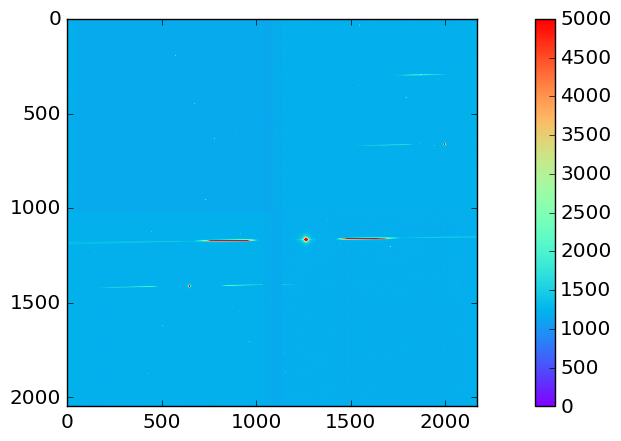

In [7]:
im=plt.imshow(image_data,cmap='rainbow',vmin=0,vmax=5000)
plt.colorbar(im)

## Now try to apply the reduction tools

- reduction scripts written by Augustin Guyonnet

In [8]:
!ls *.py

compute.py                   overscan_subtract_andTrim.py
hapi.py                      skylev.py
header.py                    telinst.py


### probably just read the header

In [9]:
import header as header

In [10]:
%run header.py /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/fileno016.fits -k AIRMASS OBJECT DATE-OBS

/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/fileno016.fits [1.05, 'HD205905', '2016-08-23T02:55:43.922']


# Really does the job of reducing the image

- notice the python "script overscan_subtract_andTrim.py" is called from the notebook
- the inputfilename must be provided "hardcoded"

#### Step 1 : Do overscan and Trim 

In [11]:
%run overscan_subtract_andTrim.py /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/fileno016.fits

In [12]:
!ls


AstroObservLocation.ipynb           Spec_Search_AbsLines_CheckFit3.png
ExploreSED.ipynb                    Spec_Search_FRO2_AbsLines_Check.png
FirstSpectrum_fileno016.ipynb       Spec_Search_FraunhauferAbsLines.png
FirstSpectrum_fileno016.pdf         TestAugustinScripts.ipynb
FirstSpectrum_fileno016.slides.html ViewDarkAndMaster.ipynb
Histo2D.ipynb                       ViewTrimImages.ipynb
HitranData.ipynb                    ViewfirstImage.ipynb
MakeLogBook.ipynb                   compute.py
OverscanAllImages.ipynb             fileno016.png
ProcessCorrImages.ipynb             hapi.py
ProcessTrimImages.ipynb             header.py
README.md                           header.pyc
SED_hd205905_stis_003.pdf           image.png
ShowLogBook.ipynb                   imagebgsub.png
Slide_FirstSpectrum.ipynb           imagerot.png
Slide_FirstSpectrum.pdf             logbk_HD205905.fits
Slide_FirstSpectrum.slides.html     newtable.fits
Spec_Search_AbsLines.jpg            overscan_subtract_andTrim.p

#### Check the image overscan and trim

In [13]:
trim_hdu_list=fits.open('trim_fileno016.fits') # read reduced 
trim_hdu_list.info()

Filename: trim_fileno016.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     133   (2048, 2048)   float64   


In [14]:
trim_image_data = trim_hdu_list[0].data

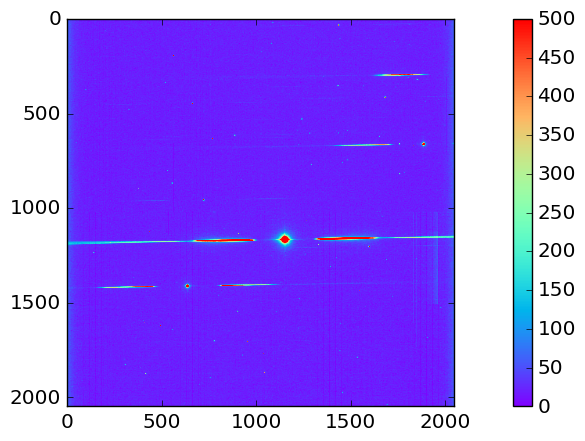

In [15]:
im=plt.imshow(trim_image_data,cmap='rainbow',vmin=0,vmax=500)
plt.colorbar(im)

## Another way to do overscan and subtract

In [16]:
import overscan_subtract_andTrim as ovsubtrim

In [17]:
ovsubtrim.Do_overscan_subtract_andTrim(fullfile)